In [2]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup

In [3]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    random_unitary,
    simulation)

In [22]:
u = random_unitary.random_unitary_in_subspace(num_qbits=4, energy_subspace=2, seed=0)

In [101]:
N = 8
num_chunks = 2
chunk_size = N//num_chunks;
num_iterations = 500
measurments = [measure.pops, measure.extractable_work_of_each_qubit]

initial_pops = [.4 for _ in range(N)]
initial_pops[0] = .2
initial_pops[4] = .2
# initial_pops = np.random.random(N)/2
# print(initial_pops)

num_samples = 1
basis = DM.energy_basis(chunk_size)
identity = DM.Identity(basis)

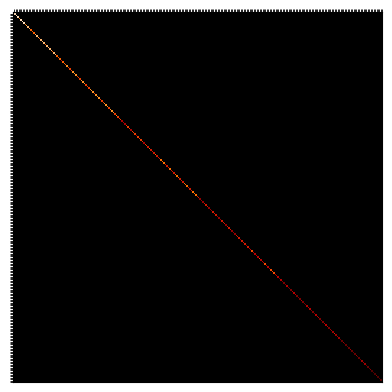

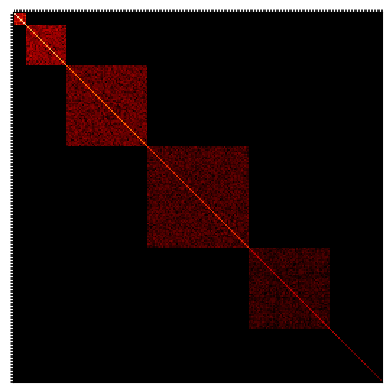

0


In [105]:
# orderings
# gas_orderings = orders.n_random_gas_orders(num_qbits=N,chunk_sizes = [4,4],n = num_iterations)
line_orderings= orders.n_random_c6_orders(num_qbits=N,n = num_iterations)
# five_orderings = orders.n_8qbit_c5_orders(n = num_iterations)
# messenger_orderings = orders.n_alternating_messenger_orders(num_qbits=N,n=num_iterations)

orderings = [line_orderings]

unitary = []
chunk_size =4
unitary_energy_subspace = 1
unitary_rng = 0

for _ in range(num_iterations):
    sub_unitary = random_unitary.random_unitary_in_subspace(num_qbits=chunk_size, energy_subspace=unitary_energy_subspace, seed=unitary_rng)
    # sub_unitary = random_unitary.random_energy_preserving_unitary(num_qbits=chunk_size, seed=unitary_rng)
    # sub_unitary.plot()
    composite_unitaries = [DM.tensor([sub_unitary if i == j else identity for i in range(num_chunks)]) for j in range(num_chunks)]
    a_unitary = np.product(composite_unitaries)
    unitary.append(a_unitary)
    
# unitary = a_unitary


titles = ["six"]
results = defaultdict(lambda: defaultdict(list))

system.plot()
for i,ordering in enumerate(orderings):
    results[titles[i]]["pops"] = []
    results[titles[i]]["ex_work"] = []
    for index in range(num_samples):

        

        system = DM.n_thermal_qbits(initial_pops)
        system.change_to_energy_basis()

        data,end = sim.run(system,
                          measurement_set = measurments,
                          num_iterations = num_iterations,
                          orders = ordering,
                          Unitaries = unitary
                          );
        # end.change_to_canonical_basis()
        end.plot()

        if index %10==0: print(index)
        
        results[titles[i]]["pops"].append(data[0])
        results[titles[i]]["ex_work"].append(data[1])

In [90]:
trial = 'six'
processed_samples_gas = [np.sum(np.diff(results[20:],1,0)>0,0)/num_iterations for results in results[trial]["ex_work"]]
gas_sample_pops = results[trial]["pops"]
gas_samples_extractable_work = results[trial]["ex_work"]

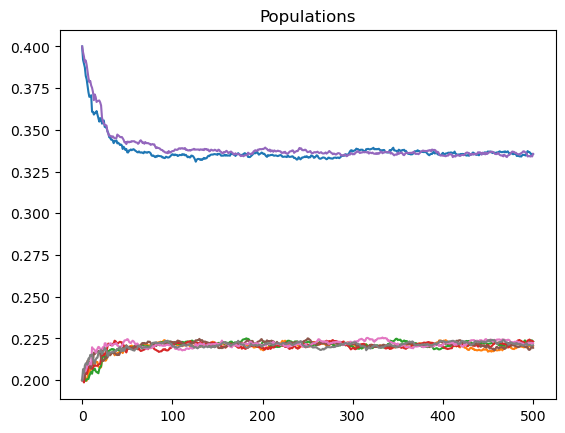

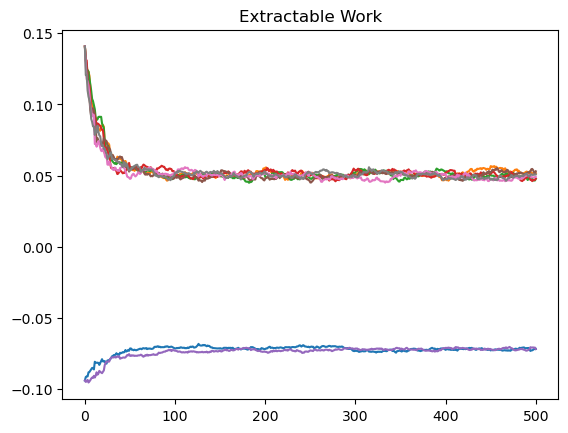

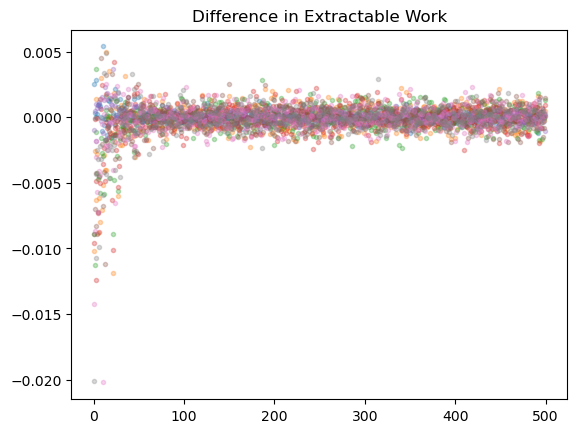

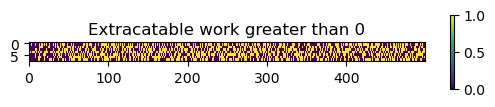

In [88]:
index = 0
start = 0
plt.plot(gas_sample_pops[index])
plt.title("Populations")
plt.show()
plt.plot(gas_samples_extractable_work[index])
plt.title("Extractable Work")
plt.show()
plt.plot([np.diff(results,1,0)for results in gas_samples_extractable_work][index],'.',alpha = .3)
plt.title("Difference in Extractable Work")
plt.show()
plt.imshow([np.diff(results,1,0)for results in gas_samples_extractable_work][index].T>0,aspect=3, interpolation='none')
plt.title("Extracatable work greater than 0")
plt.colorbar(shrink=0.2)
plt.show()


In [13]:
processed_cold["seven"].shape

(100,)

In [ ]:
python3 simulation_CLI.py \
    --ordering_type ${ORDERINGTYPE} \
    --ordering_seed ${ORDERINGSEED} \
    --unitary_seed ${UNITARYSEED} \
    --unitary_energy_subspace ${UNITARYENERGYSUBSPACE} \
    --num_steps ${NUMSTEPS} \
    --pops ${POPS}

 c6 $(Process) 0 2 100 .4,.2,.2,.2,.4,.2,.2,.2